In [5]:

!pip install -q numpy
!pip install -q pandas
!pip install -q gensim
!pip install -q pynndescent>=0.4
!pip install -q umap-learn
!pip install -q hdbscan
!pip install -q wordcloud
!pip install -q tensorflow
!pip install -q tensorflow_hub
!pip install -q tensorflow_text
!pip install -q torch
!pip install -q sentence_transformers
!pip install -q hnswlib
!pip install -q joblib<1.0.0

     |████████████████████████████████| 88 kB 3.8 MB/s 
     |████████████████████████████████| 5.2 MB 4.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 5.8 MB 5.4 MB/s 
     |████████████████████████████████| 588.3 MB 14 kB/s 
     |████████████████████████████████| 6.0 MB 39.3 MB/s 
     |████████████████████████████████| 1.7 MB 49.4 MB/s 
     |████████████████████████████████| 439 kB 74.6 MB/s 
     |████████████████████████████████| 85 kB 3.0 MB/s 
     |████████████████████████████████| 5.8 MB 10.5 MB/s 
     |████████████████████████████████| 1.3 MB 56.2 MB/s 
     |████████████████████████████████| 182 kB 37.8 MB/s 
     |████████████████████████████████| 7.6 MB 56.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
/bin/bash: 1.0.0: No such file or directory


In [6]:
!pip install -q top2vec[sentence_transformers]

     |████████████████████████████████| 24.1 MB 8.2 MB/s 
     |████████████████████████████████| 67 kB 6.7 MB/s 


In [3]:
!pip install "numpy<1.23.0"


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.9 MB 4.8 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5


In [1]:
import numpy as np
import pandas as pd
from copy import deepcopy
from top2vec import Top2Vec

In [2]:
df = pd.read_csv("csv_Bible.csv")
del df['Unnamed: 1']
df


,THE HOLY BIBLE
0,TRANSLATED FROM THE LATIN VULGATE
1,"DILIGENTLY COMPARED WITH THE HEBREW, GREEK, AND"
2,OTHER EDITIONS IN DIVERS LANGUAGES
3,DOUAY-RHEIMS VERSION
4,"1609, 1582"
...,...
112291,Jesus
112292,21 The grace of our Lord Jesus Christ be with
112293,you all Amen
112294,The Apocalypse of St John the Apostle


In [3]:
docs = df.stack().apply(str).tolist()

print(docs)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
model = Top2Vec(docs, embedding_model='universal-sentence-encoder')

2022-12-27 19:46:03,620 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-12-27 19:46:07,003 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2022-12-27 19:46:12,952 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-12-27 19:46:48,644 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-12-27 19:50:25,415 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-12-27 19:50:37,358 - top2v

In [5]:
model.get_num_topics()


703

In [6]:
topic_words, word_scores, topic_nums = model.get_topics(5)

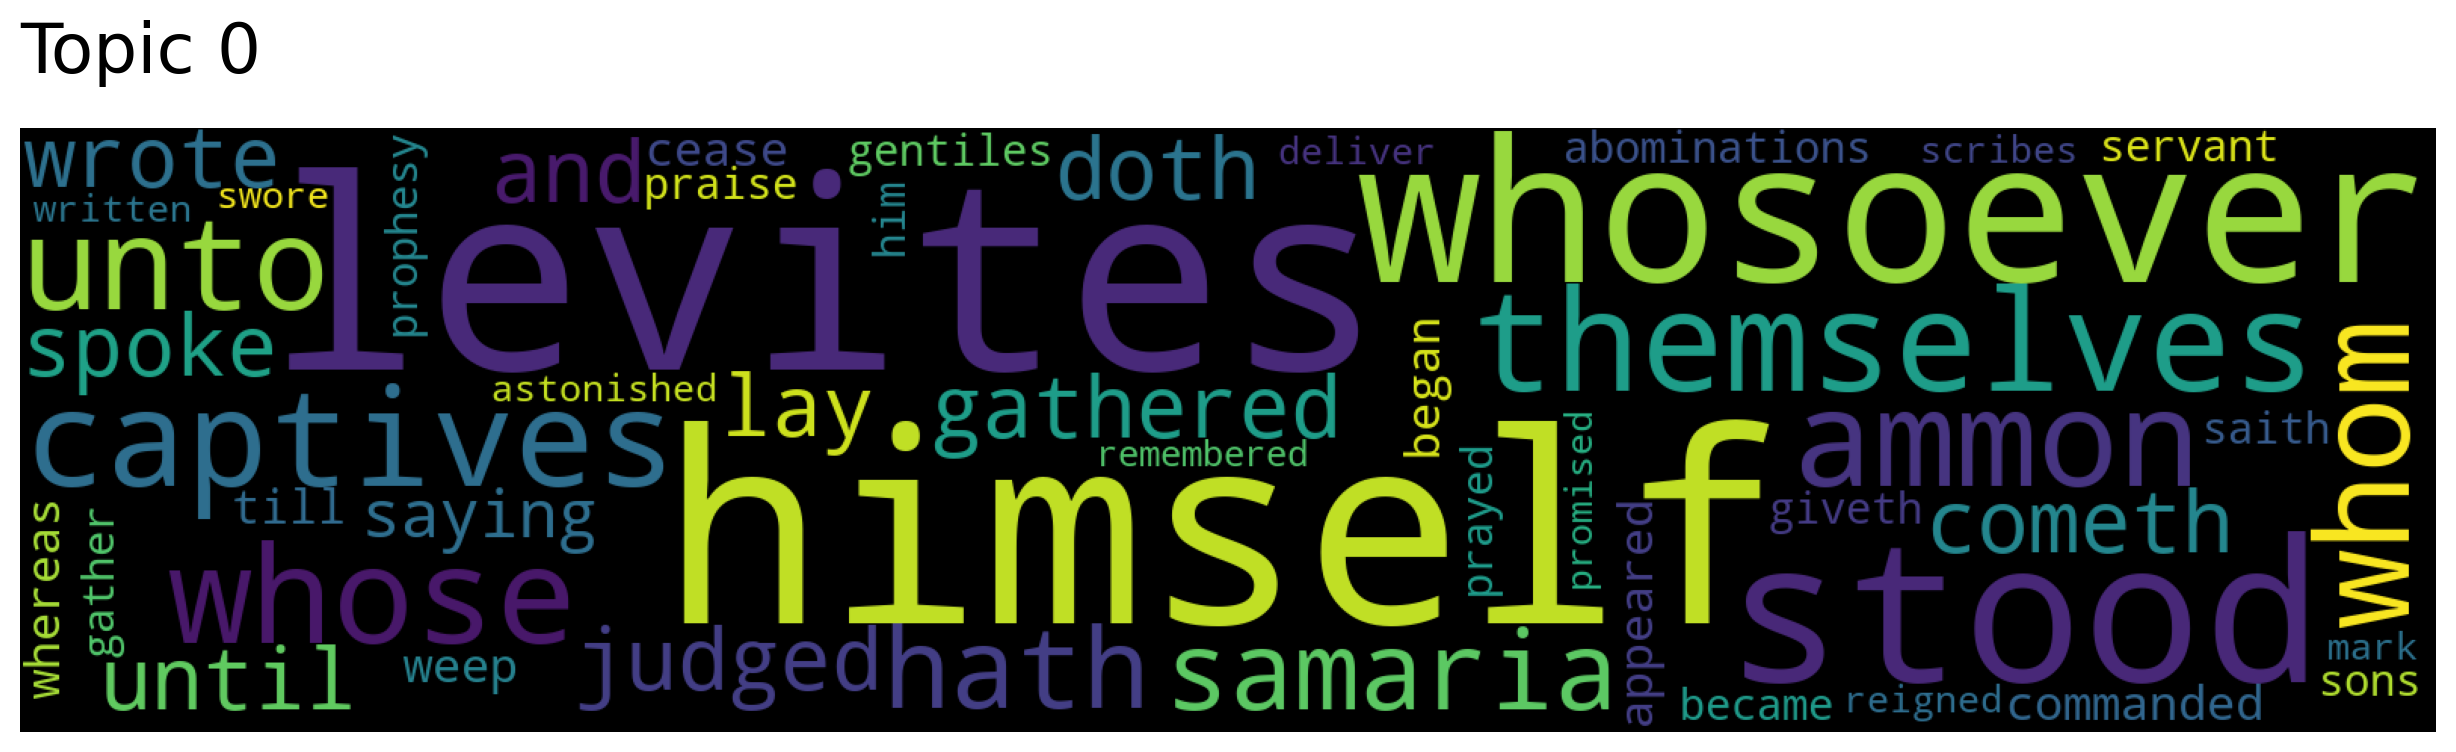

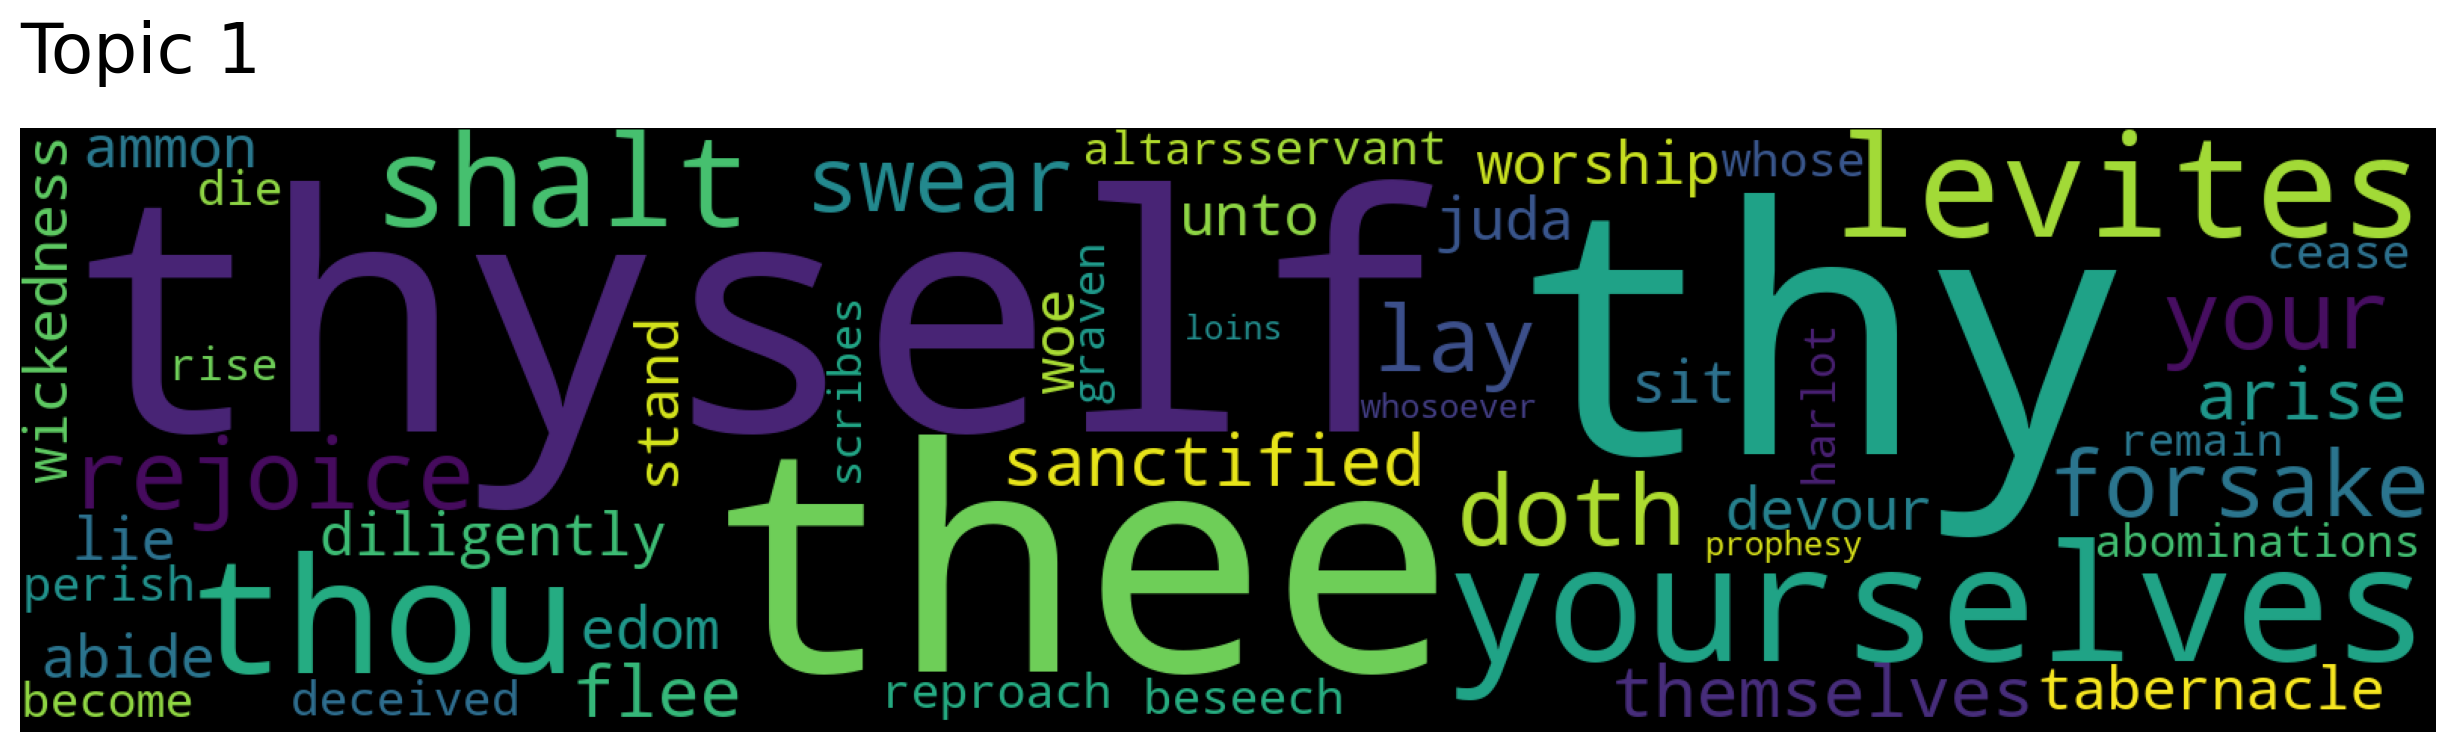

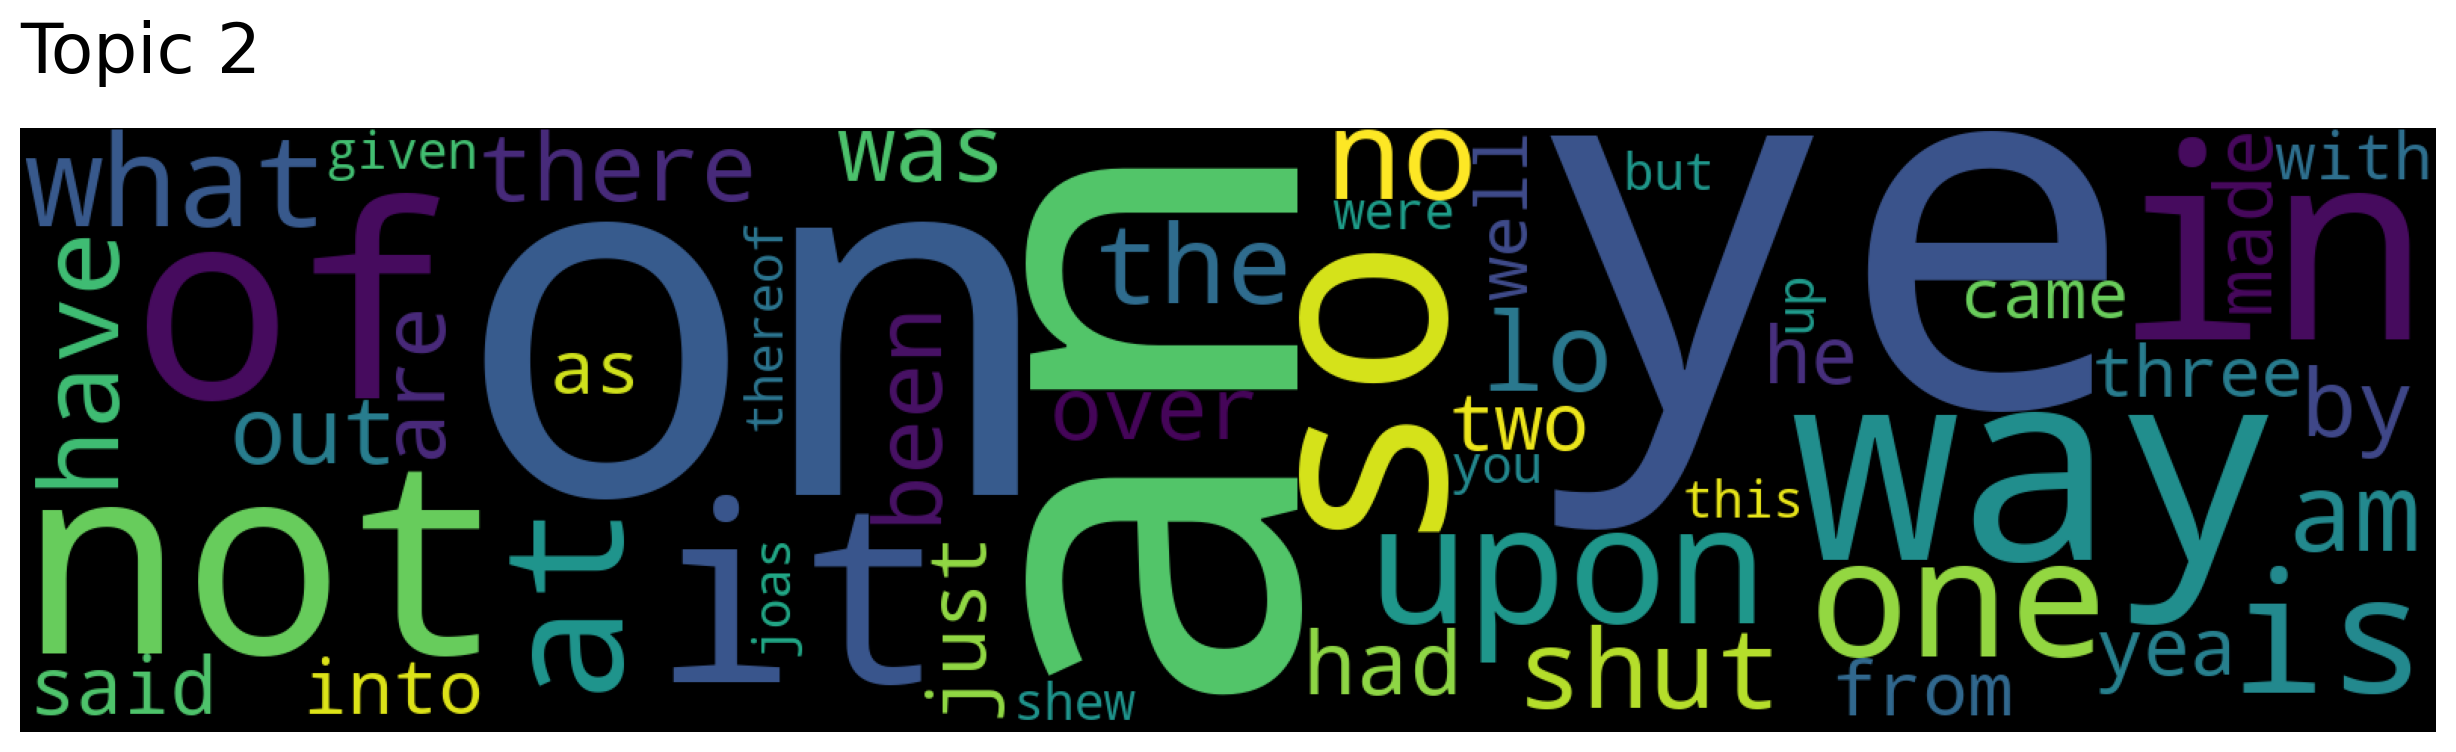

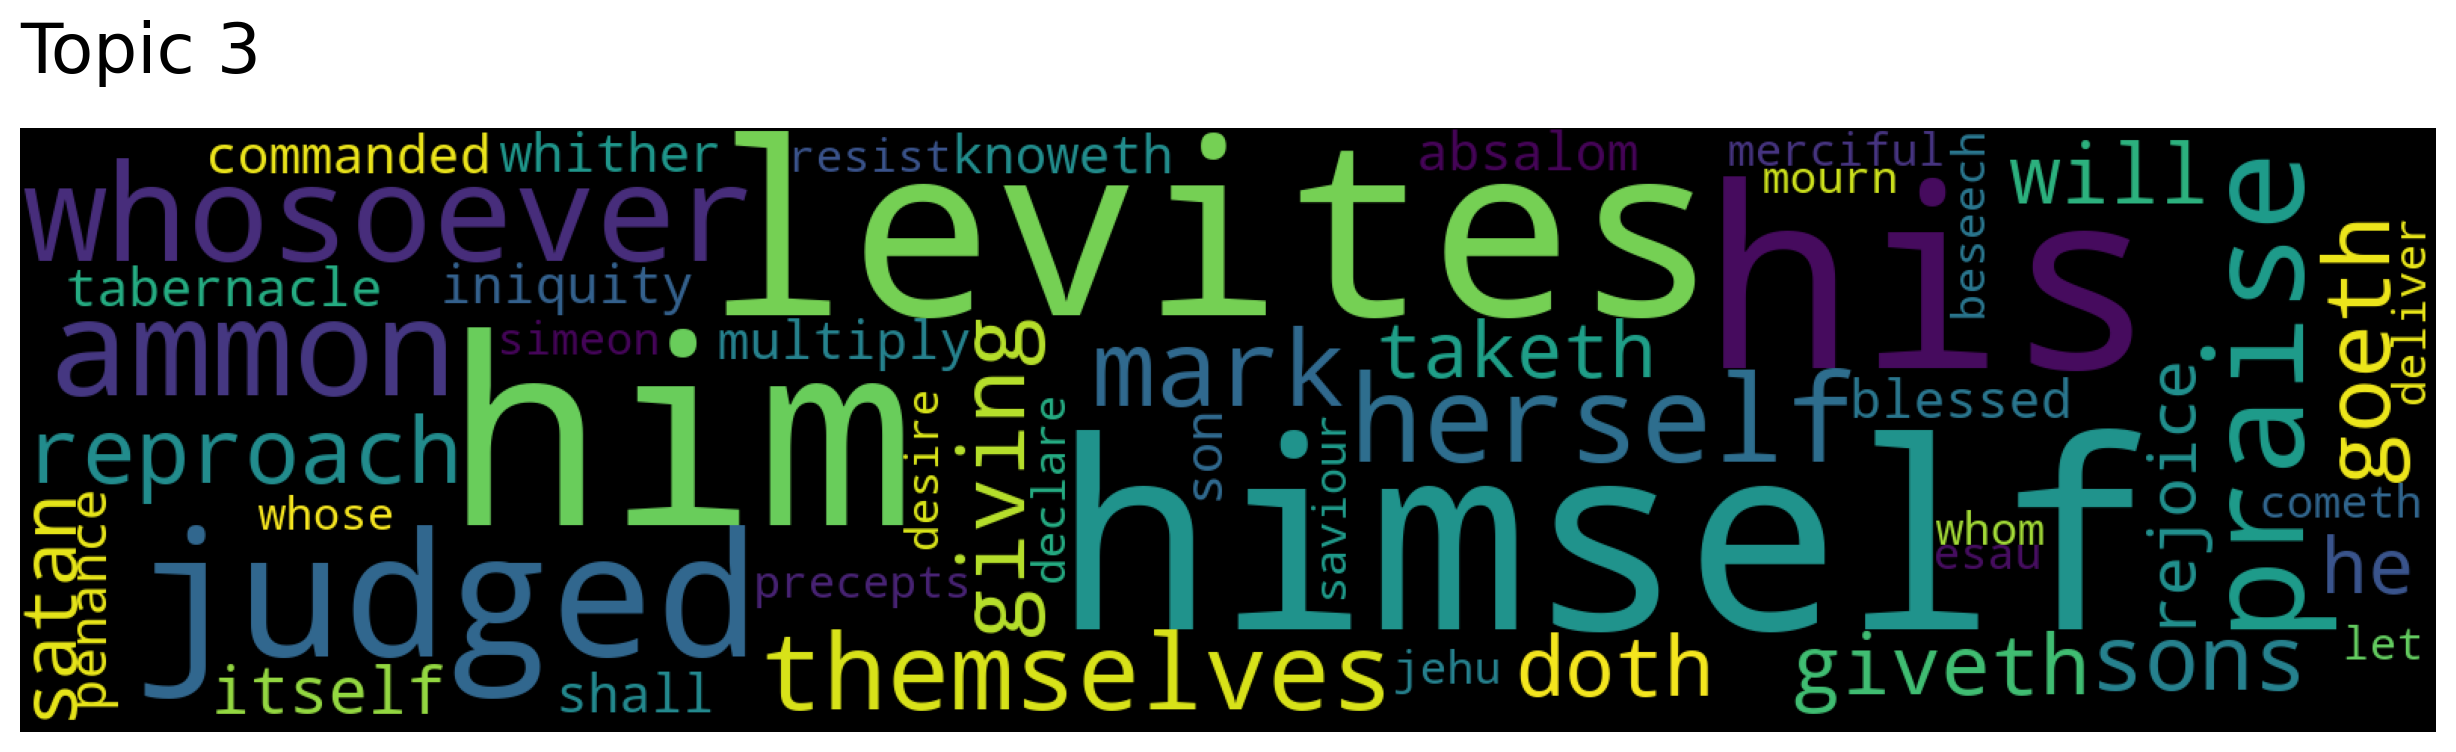

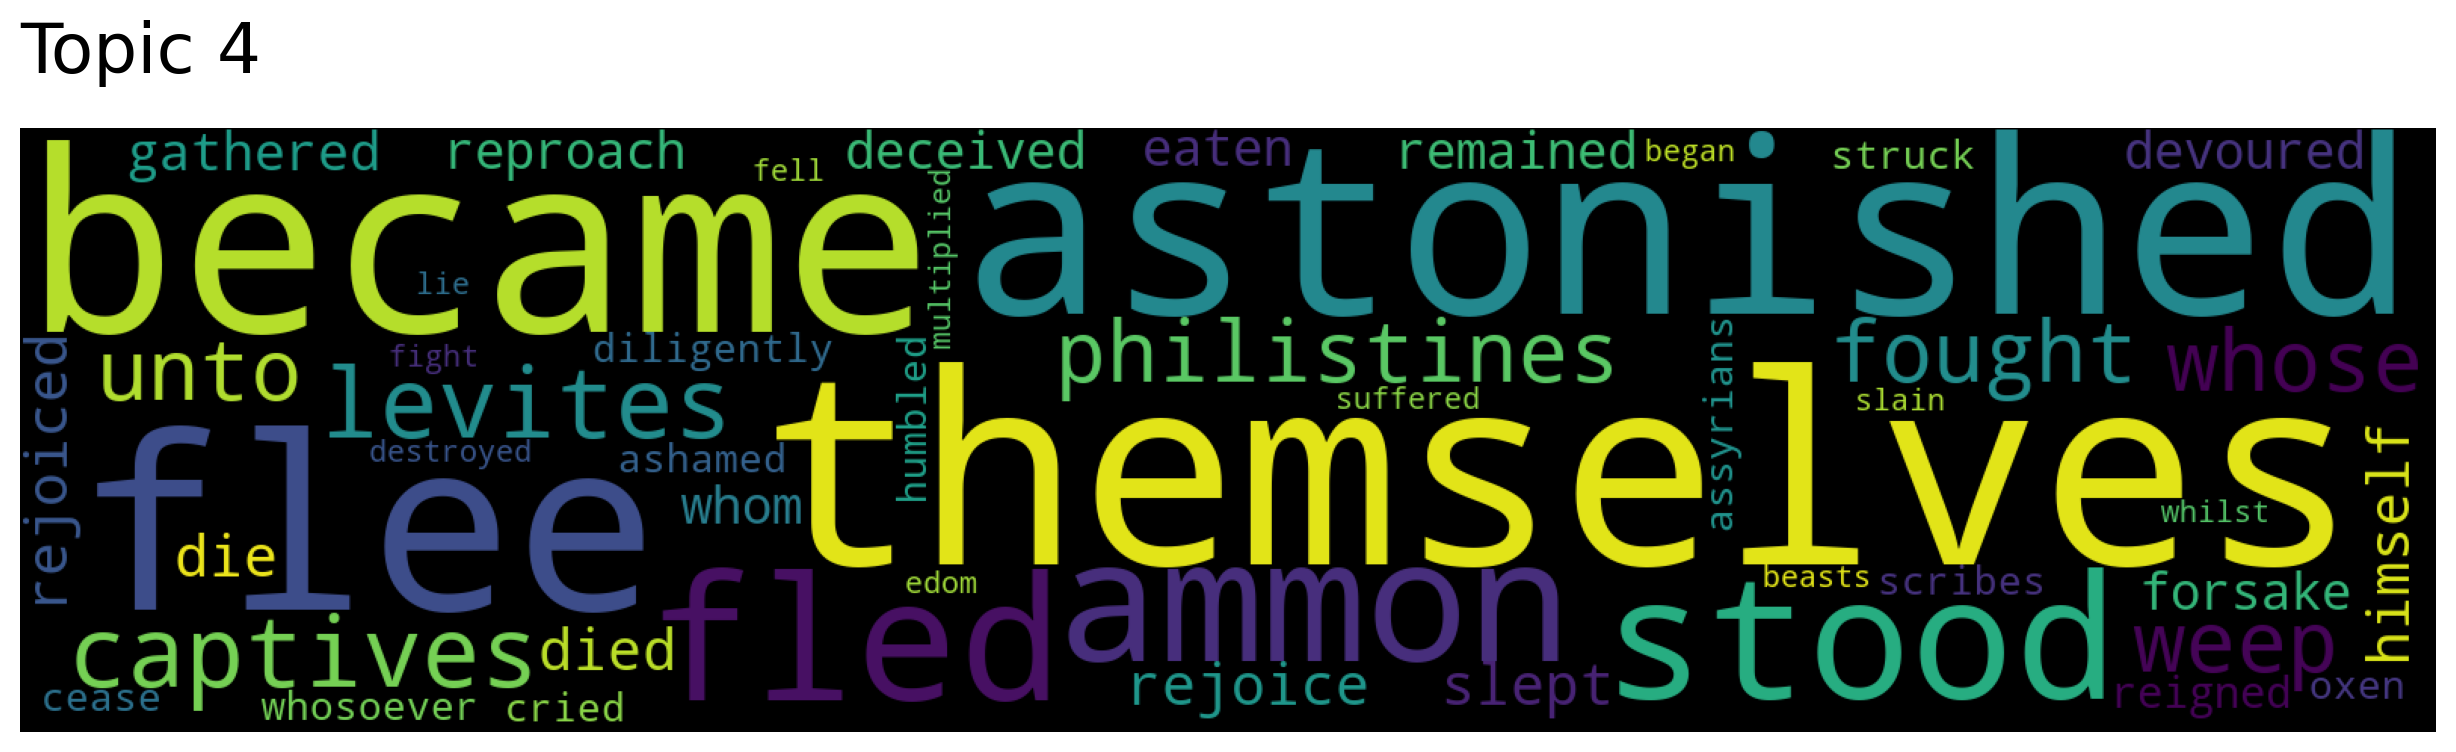

In [7]:
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)